In [1]:
# Step 1. Import Necessary Libraries

# Foremost, we need to import the necessary libraries. We are going to use TensorFlow with Keras for building the Bidirectional LSTM. 

# In case any of the mentioned libraries are not installed, then just install it with pip install [package-name] command in the terminal.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [3]:
# Step 2. Loading the Dataset and Exploratory Data Analysis

# Now, we’ll load our dataset using pandas. Further, we need to perform some Exploratory Data Analysis so that we get to know our data better.
# As we are dealing with text data, the best way to do so is by generating a word cloud.

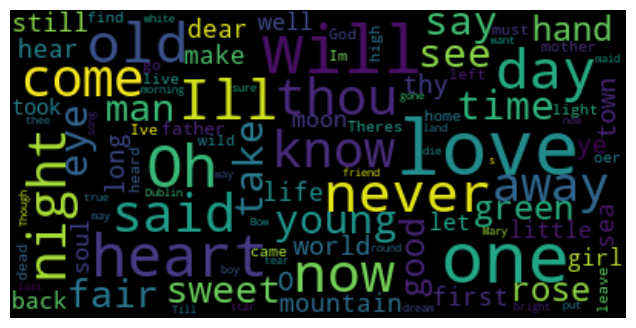

In [4]:
# Reading the text data file
data = open('poem.txt', encoding="utf8").read()

# EDA: Generating WordCloud to visualize
# the text
wordcloud = WordCloud(max_font_size=50,
					max_words=100,
					background_color="black").generate(data)

# Plotting the WordCloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloud.png")
plt.show()

In [5]:
# Step 3. Creating the Corpus

# Now, we have all our data present in this massive text file. However, it is not recommended to feed our mode with all the data altogether as it would lead to a lesser accuracy.
# Thus, we will be splitting our text into lines so that we can use them to generate text embeddings for our model.

In [6]:
# Generating the corpus by
# splitting the text into lines
corpus = data.lower().split("\n")
print(corpus[:10])

['stay, i said', 'to the cut flowers.', 'they bowed', 'their heads lower.', 'stay, i said to the spider,', 'who fled.', 'stay, leaf.', 'it reddened,', 'embarrassed for me and itself.', 'stay, i said to my body.']


In [7]:
# Step 4. Fitting the Tokenizer on the Corpus

# In order to generate the embeddings later, we need to fit a TensorFlow Tokenizer on the entire corpus so that it learns the vocabulary.  

In [8]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)
print("Total Words:", total_words)
print(tokenizer.word_index)


Total Words: 3807
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'in': 7, 'my': 8, 'me': 9, 'for': 10, 'you': 11, 'with': 12, 'that': 13, 'all': 14, 'is': 15, 'was': 16, 'but': 17, 'on': 18, 'she': 19, 'as': 20, 'it': 21, 'her': 22, 'love': 23, 'your': 24, 'when': 25, 'be': 26, 'not': 27, 'by': 28, 'are': 29, 'they': 30, 'from': 31, 'will': 32, 'no': 33, 'he': 34, 'one': 35, 'so': 36, 'or': 37, 'at': 38, 'old': 39, 'if': 40, 'oh': 41, 'his': 42, 'we': 43, 'ill': 44, 'what': 45, 'down': 46, 'there': 47, 'heart': 48, 'can': 49, 'now': 50, 'where': 51, 'never': 52, 'were': 53, 'this': 54, 'like': 55, 'thou': 56, 'their': 57, 'away': 58, 'said': 59, 'have': 60, 'young': 61, 'go': 62, 'know': 63, 'did': 64, 'night': 65, 'come': 66, 'then': 67, 'out': 68, 'them': 69, 'our': 70, 'had': 71, 'green': 72, 'its': 73, 'see': 74, 'fair': 75, 'day': 76, 'sweet': 77, 'take': 78, 'more': 79, 'who': 80, 'good': 81, 'would': 82, 'man': 83, 'o': 84, 'up': 85, 'world': 86, 'still': 87, 'ever': 88,

In [9]:
# Step 5. Generating Embeddings/Vectorization

# Now we will generate embeddings for each sentence in our corpus.
# Embeddings are vectorized representations of our text. Since we cannot feed Machine/Deep Learning models with unstructured text, this is an imperative step.
# Firstly, we convert each sentence to embedding using Keras’ text_to_sequence() function.
# Then we compute the length of the longest embedding; finally, we pad all the embeddings to that maximum length with zeros so as to ensure embeddings of equal length.

In [10]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

16


In [11]:
# Step 6. Building the Bi-directional LSTM Model 

# By now, we are done with all the pre-processing steps that were required in order to feed the text to our model.
# Its time now that we start building the model.
# Since this is a use case of text generation, we will create a Bi-directional LSTM model as meaning plays an important role here. 

In [12]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 100)           380800    
                                                                 
 bidirectional (Bidirectiona  (None, 15, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 3807)              384507    
                                                                 
 dense_1 (Dense)             (None, 3808)              14500864  
                                                        

In [13]:
# Step 7. Model Training

# Having built the model architecture, we’ll now train it on our pre-processed text. Here, we have trained our model for 150 Epochs. 

In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
510/510 [==============================] - 143s 224ms/step - loss: 6.9379 - accuracy: 0.0620
Epoch 2/150
139/510 [=======>......................] - ETA: 1:30 - loss: 6.5164 - accuracy: 0.0656

In [ ]:
def plot_graph(history,string):
    plt.plot(history.history[string])
    plt.title('graph')
    # naming the x axis
    plt.xlabel('x - axis')
    # naming the y axis
    plt.ylabel('y - axis')
    plt.show()
  
plot_graph(history,'accuracy')

In [ ]:
# Step 8. Generating Text using the Built Model

# In the final step, we will generate poetry using our model.
# As stated earlier, the model is based upon a next-word prediction approach – hence, we need to provide the model with some seed text.

In [ ]:
seed_text = "the world"
next_words = 25

ouptut_text = ""

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences(
		[token_list], maxlen=max_sequence_len-1,
	padding='pre')
	predicted = np.argmax(model.predict(token_list,
										verbose=0), axis=-1)
	output_word = ""
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
			
	seed_text += " " + output_word
	
print(seed_text)